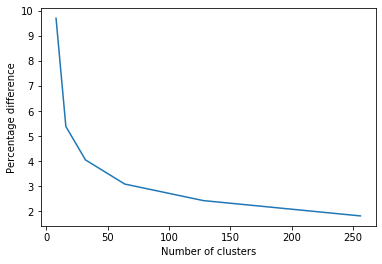

<Figure size 432x288 with 0 Axes>

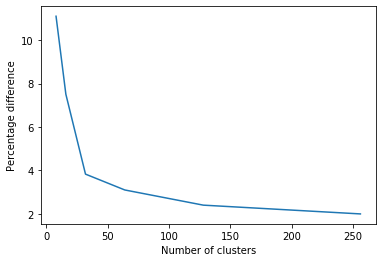

<Figure size 432x288 with 0 Axes>

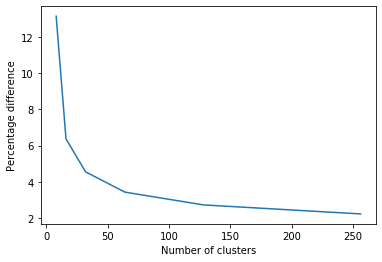

<Figure size 432x288 with 0 Axes>

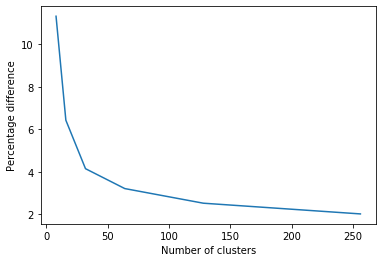

<Figure size 432x288 with 0 Axes>

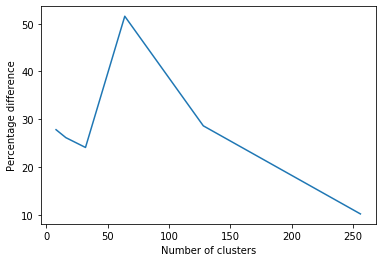

<Figure size 432x288 with 0 Axes>

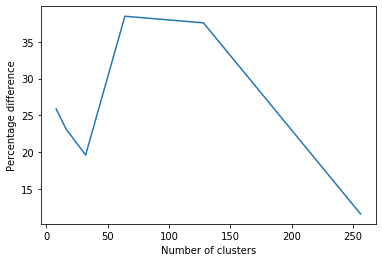

<Figure size 432x288 with 0 Axes>

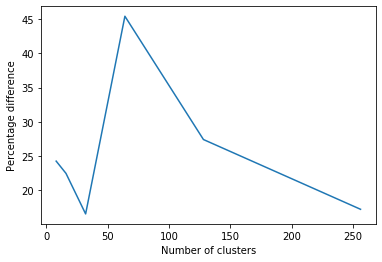

<Figure size 432x288 with 0 Axes>

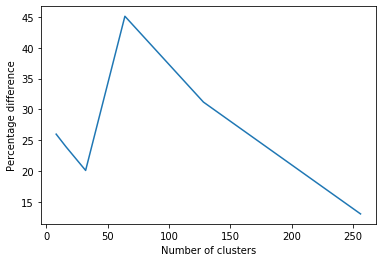

<Figure size 432x288 with 0 Axes>

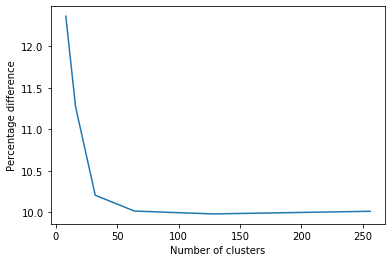

<Figure size 432x288 with 0 Axes>

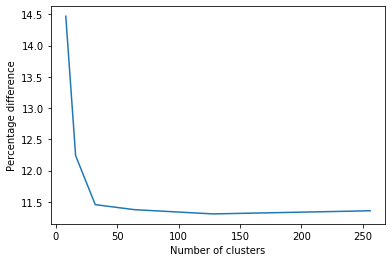

<Figure size 432x288 with 0 Axes>

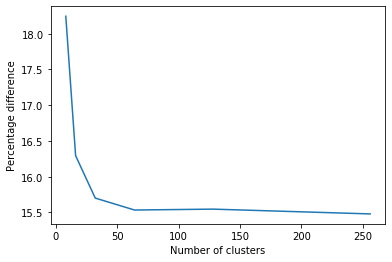

<Figure size 432x288 with 0 Axes>

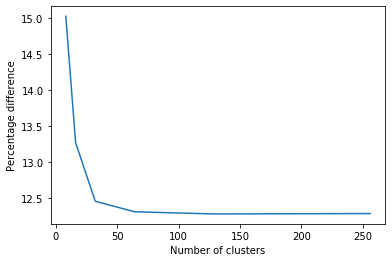

<Figure size 432x288 with 0 Axes>

In [3]:
#evaluates data
import sys
import math
import timeit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.misc as smp
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D
from skimage import io

#custom modules
import find_closest_cluster
import plot_rgb
import k_means
import fig_io

def r_perc_diff(pixel_data): #returns the mean percentage difference
    perc_diff=(pixel_data['red']-pixel_data['r_cluster'])/pixel_data['red']
    perc_diff=abs(perc_diff*100)
    perc_diff=perc_diff.mean()
    return perc_diff

def g_perc_diff(pixel_data): #returns the mean percentage difference
    perc_diff=(pixel_data['green']-pixel_data['g_cluster'])/pixel_data['green']
    perc_diff=abs(perc_diff*100)
    perc_diff=perc_diff.mean()
    return perc_diff

def b_perc_diff(pixel_data): #returns the mean percentage difference
    perc_diff=(pixel_data['blue']-pixel_data['b_cluster'])/pixel_data['blue']
    perc_diff=abs(perc_diff*100)
    perc_diff=perc_diff.mean()
    return perc_diff

def output_graphs(algorithm):
    cluster_no=[256,128,64,32,16,8]
    perc_diff_r=[]
    perc_diff_g=[]
    perc_diff_b=[]

    for i in cluster_no:
        pixel_data = pd.read_csv("data/"+algorithm+"_"+str(i)+"_pixel_data.csv")
        perc_diff_r.append(r_perc_diff(pixel_data))
        perc_diff_g.append(g_perc_diff(pixel_data))
        perc_diff_b.append(b_perc_diff(pixel_data))
    perc_diff=[(perc_diff_r+perc_diff_g+perc_diff_b)/3 for perc_diff_r,perc_diff_g,perc_diff_b in zip(perc_diff_r,perc_diff_g,perc_diff_b)]
    plot_rgb.plot_perc_diff(cluster_no,perc_diff_r,'red',algorithm)
    plot_rgb.plot_perc_diff(cluster_no,perc_diff_g,'green',algorithm)
    plot_rgb.plot_perc_diff(cluster_no,perc_diff_b,'blue',algorithm)
    plot_rgb.plot_perc_diff(cluster_no,perc_diff,'all',algorithm)
    

output_graphs('k_means')
output_graphs('wta')
output_graphs('kohonen')